In [35]:
# Sample data
categories = ['aiohttp', 'websockets']
num_files = [100, 200, 300, 400, 500]
aiovalues1 = []
aiovalues2 = []
wsvalues1 = []
wsvalues2 = []


In [36]:
import os
import json
import time

import aiohttp

HOST = os.getenv('HOST', 'localhost')
PORT = int(os.getenv('PORT', 8080))

URL = f'http://{HOST}:{PORT}/ws'

async def client(file_count):
    session = aiohttp.ClientSession()
    async with session.ws_connect(URL) as ws:

        await ws.send_str(str(file_count))
        
        start2 = time.perf_counter()
        async for msg in ws:
            data_received = msg.data
            # Convert received data to a Python dictionary from JSON format
            data_received = json.loads(data_received.replace("'", '"'))
            # Extract the filename to save from the received data
            filename_to_save = data_received["filename"]
            # Convert the content to bytes for writing to a file
            file_content = bytes(data_received["content"])
            # Write the content to a file with the specified filename
            with open(f"{filename_to_save}", 'wb') as file:
                file.write(file_content)

        await session.close()
        
        end2 = time.perf_counter()
        aiovalues2.append(end2 - start2)
        


for file_count in num_files:
    start = time.perf_counter()
    await client(file_count)
    end = time.perf_counter()
    aio_time_elapsed = (end-start)
    print(aio_time_elapsed)
    aiovalues1.append(aio_time_elapsed)
        


3.4583482000016375
5.951324999998178
8.92642429999978
11.883456899999146
15.686208499999339


In [37]:
import asyncio
import websockets
import json
import datetime

async def receive_file(websocket, file_count):
    for i in range(file_count):
        try:
            # Receive data from the WebSocket connection
            data_received = await websocket.recv()
            # Convert received data to a Python dictionary from JSON format
            data_received = json.loads(data_received.replace("'", '"'))
            # Extract the filename to save from the received data
            filename_to_save = data_received["filename"]
            # Convert the content to bytes for writing to a file
            file_content = bytes(data_received["content"])
            # Write the content to a file with the specified filename
            with open(f"{filename_to_save}", 'wb') as file:
                file.write(file_content)
        except websockets.ConnectionClosedOK:
            break


async def client(file_count):
    # Establish a WebSocket connection to the specified address
    async with websockets.connect('ws://localhost:8765') as websocket:
        # Call the send_file function to send the specified file
        await websocket.send(str(file_count))
        start2 = time.perf_counter()

        await receive_file(websocket, file_count)
        
        end2 = time.perf_counter()
        wsvalues2.append(end2 - start2)


for file_count in num_files:
    start = time.perf_counter()
    await client(file_count)
    end = time.perf_counter()
        
    websockets_time_elapsed = (end-start)
    print(websockets_time_elapsed )
    wsvalues1.append(websockets_time_elapsed)


5.671207999999751
11.525517099998979
16.798889199999394
23.406395699999848
27.65014500000325


In [38]:
print(aiovalues1)
print(wsvalues1)

[3.4583482000016375, 5.951324999998178, 8.92642429999978, 11.883456899999146, 15.686208499999339]
[5.671207999999751, 11.525517099998979, 16.798889199999394, 23.406395699999848, 27.65014500000325]


In [39]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


60.980803384425144


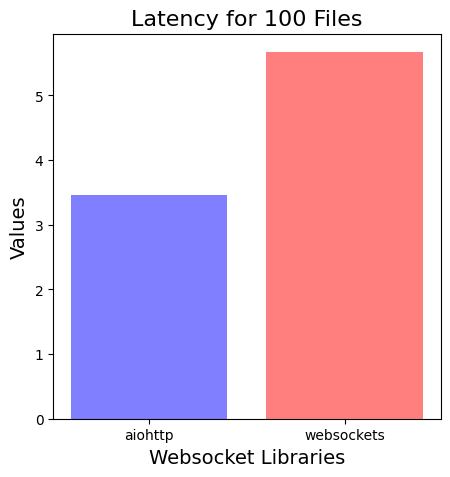

In [49]:
import matplotlib.pyplot as plt

# Sample data
categories = ['aiohttp', 'websockets']
values = []
values.append(aiovalues1[0])
values.append(wsvalues1[0])
print(aiovalues1[0] / wsvalues1[0] * 100)

# Setting the positions for the bars
pos = range(len(categories))

# Plotting the bars
fig, ax = plt.subplots(figsize=(5, 5))

# Creating the bar plot
bars = plt.bar(pos, values, alpha=0.5, color=['b', 'r'])

# Adding labels, title, and ticks
plt.xlabel('Websocket Libraries', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Latency for 100 Files', fontsize=16)
plt.xticks(pos, categories)
plt.show()


In [41]:
print(aiovalues1[0])
print(wsvalues1[0])

3.4583482000016375
5.671207999999751


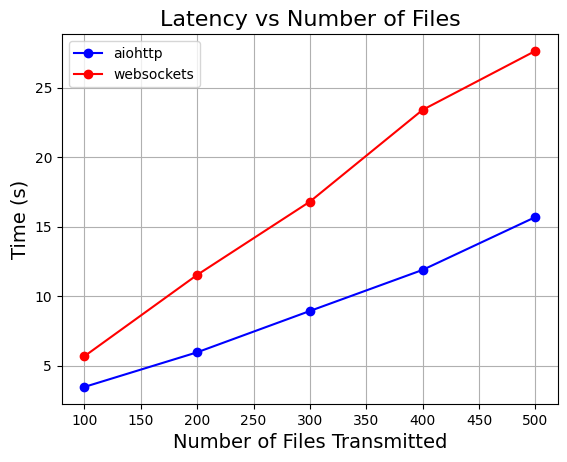

In [47]:
import matplotlib.pyplot as plt

# Sample data (number of files transmitted and corresponding transaction times for aiohttp and websockets)
aio_time_elapsed = aiovalues1
websockets_time_elapsed = wsvalues1

# Plotting the line plots for aiohttp and websockets
plt.plot(num_files, aio_time_elapsed, marker='o', linestyle='-', color='b', label='aiohttp')
plt.plot(num_files, websockets_time_elapsed, marker='o', linestyle='-', color='r', label='websockets')

# Adding labels, title, and legend
plt.xlabel('Number of Files Transmitted', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Latency vs Number of Files', fontsize=16)
plt.legend()

# Showing plot
plt.grid(True)
plt.show()


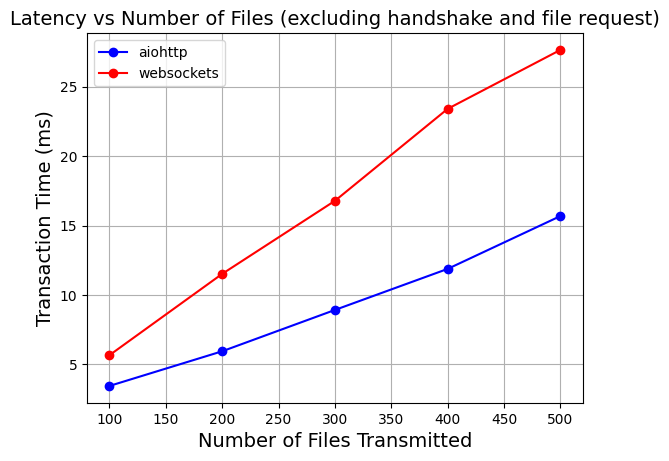

In [43]:
import matplotlib.pyplot as plt

# Sample data (number of files transmitted and corresponding transaction times for aiohttp and websockets)
aio_time_elapsed = aiovalues2
websockets_time_elapsed = wsvalues2

# Plotting the line plots for aiohttp and websockets
plt.plot(num_files, aio_time_elapsed, marker='o', linestyle='-', color='b', label='aiohttp')
plt.plot(num_files, websockets_time_elapsed, marker='o', linestyle='-', color='r', label='websockets')

# Adding labels, title, and legend
plt.xlabel('Number of Files Transmitted', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Latency vs Number of Files (excluding handshake and file request)', fontsize=14)
plt.legend()

# Showing plot
plt.grid(True)
plt.show()


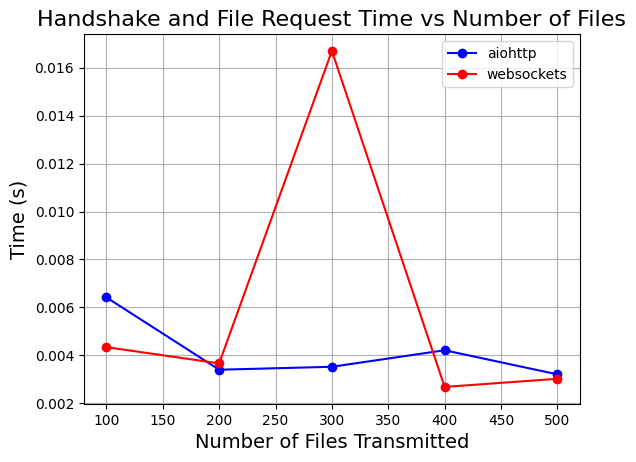

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (number of files transmitted and corresponding transaction times for aiohttp and websockets)
aio_time_elapsed = np.subtract(aiovalues1, aiovalues2)
websockets_time_elapsed = np.subtract(wsvalues1, wsvalues2)

# Plotting the line plots for aiohttp and websockets
plt.plot(num_files, aio_time_elapsed, marker='o', linestyle='-', color='b', label='aiohttp')
plt.plot(num_files, websockets_time_elapsed, marker='o', linestyle='-', color='r', label='websockets')

# Adding labels, title, and legend
plt.xlabel('Number of Files Transmitted', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Handshake and File Request Time vs Number of Files', fontsize=16)
plt.legend()

# Showing plot
plt.grid(True)
plt.show()

aiohttp throughput = 7893.941969171026 KBytes per second
websockets throughput =  4813.789231500801 KBytes per second
163.98603240694695


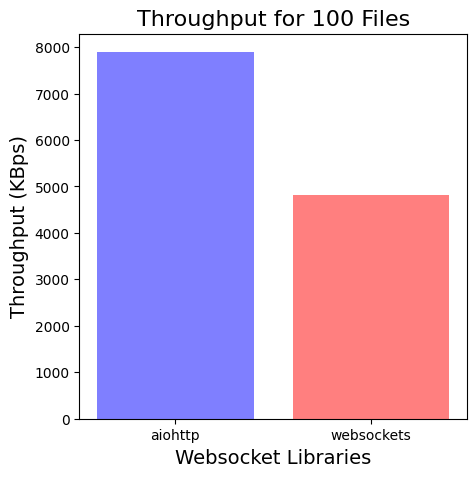

In [48]:
file_size = 273 # in KB
aio_throughput = 273 * 100 / aiovalues1[0]
ws_throughput = 273  * 100 / wsvalues1[0]

print("aiohttp throughput =", aio_throughput, "KBytes per second")
print("websockets throughput = ", ws_throughput, "KBytes per second")
print(aio_throughput / ws_throughput * 100)

# Sample data
categories = ['aiohttp', 'websockets']
values = []
values.append(aio_throughput)
values.append(ws_throughput)

# Setting the positions for the bars
pos = range(len(categories))

# Plotting the bars
fig, ax = plt.subplots(figsize=(5, 5))

# Creating the bar plot
bars = plt.bar(pos, values, alpha=0.5, color=['b', 'r'])

# Adding labels, title, and ticks
plt.xlabel('Websocket Libraries', fontsize=14)
plt.ylabel('Throughput (KBps)', fontsize=14)
plt.title('Throughput for 100 Files', fontsize=16)
plt.xticks(pos, categories)
plt.show()